# BanditPAM: Almost Linear-Time k-Medoids Clustering

This repo contains a high-performance implementation of BanditPAM from https://arxiv.org/abs/2006.06856. The code can be called directly from Python or C++.

If you use this software, please cite:

Mo Tiwari, Martin Jinye Zhang, James Mayclin, Sebastian Thrun, Chris Piech, Ilan Shomorony. "Bandit-PAM: Almost Linear Time k-medoids Clustering via Multi-Armed Bandits" Advances in Neural Information Processing Systems (NeurIPS) 2020.

In [ ]:
@inproceedings{BanditPAM,
  title={Bandit-PAM: Almost Linear Time k-medoids Clustering via Multi-Armed Bandits},
  author={Tiwari, Mo and Zhang, Martin J and Mayclin, James and Thrun, Sebastian and Piech, Chris and Shomorony, Ilan},
  booktitle={Advances in Neural Information Processing Systems},
  pages={368--374}, #TODO: Fix this
  year={2020}
}

# Python Quickstart

## Install the repo and its dependencies:

In [ ]:
/BanditPAM/: pip install -r requirements.txt
/BanditPAM/: sudo pip install .

### Example 1: Synthetic data from a Gaussian Mixture Model

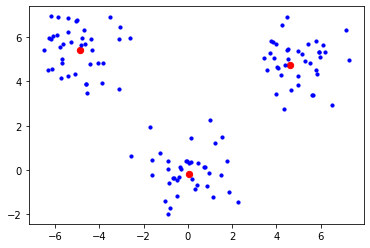

In [126]:
from BanditPAM import KMedoids
import numpy as np
import matplotlib.pyplot as plt

# Generate data from a Gaussian Mixture Model with the given means:
np.random.seed(0)
n_per_cluster = 40
means = np.array([[0,0], [-5,5], [5,5]])
X = np.vstack([np.random.randn(n_per_cluster, 2) + mu for mu in means])

# Fit the data with BanditPAM:
kmed = KMedoids(n_medoids = 3, algorithm = "BanditPAM")
kmed.fit(X, 'L2')

# Visualize the data and the medoids:
for p_idx, point in enumerate(X):
    if p_idx in map(int, kmed.final_medoids):
        plt.scatter(X[p_idx, 0], X[p_idx, 1], color='red', s = 40)
    else:
        plt.scatter(X[p_idx, 0], X[p_idx, 1], color='blue', s = 10)
plt.show()

### Example 2: MNIST and its medoids visualized via t-SNE

In [ ]:
from BanditPAM import KMedoids
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load the 1000-point subset of MNIST and calculate its t-SNE embeddings for visualization:
X = pd.read_csv('data/MNIST-1k.csv', sep=' ', header=None).to_numpy()
X_tsne = TSNE(n_components = 2).fit_transform(X)

# Fit the data with BanditPAM:
kmed = KMedoids(n_medoids = 10, algorithm = "BanditPAM")
kmed.fit(X, 'L2')

# Visualize the data and the medoids via t-SNE:
for p_idx, point in enumerate(X):
    if p_idx in map(int, kmed.final_medoids):
        plt.scatter(X_tsne[p_idx, 0], X_tsne[p_idx, 1], color='red', s = 40)
    else:
        plt.scatter(X_tsne[p_idx, 0], X_tsne[p_idx, 1], color='blue', s = 5)
plt.show()

## Building the C++ executable from source

Please note that it is not necessary to build the C++ executable from source to use the Python code above. However, if you would like to use the C++ executable directly, follow the instructions below.

### Option 1: Building with Docker

We highly recommend building using Docker. Once you have Docker installed and the Docker Daemon is running, run the following commands:

```
/BanditPAM$ chmod +x env_setup.sh
/BanditPAM$ ./env_setup.sh
/BanditPAM$ ./run_docker.sh
```

which will start a Docker instance with the necessary dependencies. Then:

```
/BanditPAM$ mkdir build && cd build
/BanditPAM/build$ cmake .. && make
```

This will create an executable named `BanditPAM` in `BanditPAM/build/src`.

### Option 2: Installing Requirements and Building Directly
Building this repository requires three external requirements:
* Cmake >= 3.17
* Armadillo >= 9.7, http://arma.sourceforge.net/download.html
* OpenMP >= 2.5, https://www.openmp.org/resources/openmp-compilers-tools/ (OpenMP is supported by default on most Linux platforms, and can be downloaded through homebrew on macs.)
* CARMA >= 0.3.0, https://github.com/RUrlus/carma

Ensure all the requirements above are installed and then run:

```
/BanditPAM$ mkdir build && cd build
/BanditPAM/build$ cmake .. && make
```

This will create an executable named `BanditPAM` in `BanditPAM/build/src`.

## Usage

Once the executable has been built, it can be invoked with: 
```
/BanditPAM/build/src/BanditPAM -f [path/to/input.csv] -k [number of clusters] -v [verbosity level]
```

* `-f` is mandatory and specifies the path to the dataset
* `-k` is mandatory and specifies the number of clusters with which to fit the data
* `-v` is optional and specifies the verbosity level.

For example, if you ran `./env_setup.sh` and downloaded the MNIST dataset, you could run:

```
/BanditPAM/build/src/BanditPAM -f ../data/MNIST-1k.csv -k 10
```

## Questions, Concerns, Feedback?

Please file an issue at https://github.com/jmayclin/BanditPAM/issues.